In [1]:
import croparray as ca
ca1 = ca.open_croparray(
    "/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/WT_XBP1/20251217_FCS/WT/DataAnalysis/Cell01.nc"
)
ta1 = ca.crop_array_tools.track_array(ca1)

In [2]:
ca2 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/FCS_data/20250826_FCS/DataAnalysis/Cell02.nc"
)
ta2 = ca.crop_array_tools.track_array(ca2)

In [13]:
ta1.track_id

<xarray.DataArray 'track_id' (track_id: 69)> Size: 552B
array([  1.,   2.,  14.,  25.,  28.,  36.,  37.,  45.,  46.,  49.,  76.,  79.,
        81., 101., 124., 132., 145., 157., 172., 181., 185., 202., 207., 209.,
       233., 256., 279., 289., 310., 311., 317., 336., 339., 340., 342., 347.,
       348., 366., 385., 386., 391., 399., 416., 417., 420., 424., 453., 466.,
       477., 485., 488., 494., 496., 506., 516., 527., 530., 540., 544., 546.,
       578., 600., 603., 620., 640., 652., 662., 674., 680.])
Coordinates:
  * track_id  (track_id) float64 552B 1.0 2.0 14.0 25.0 ... 662.0 674.0 680.0

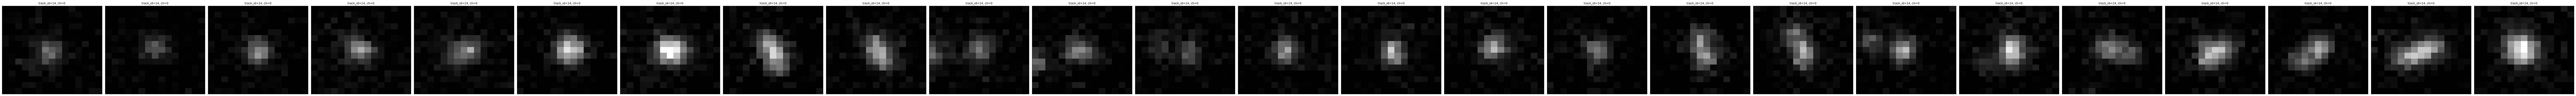

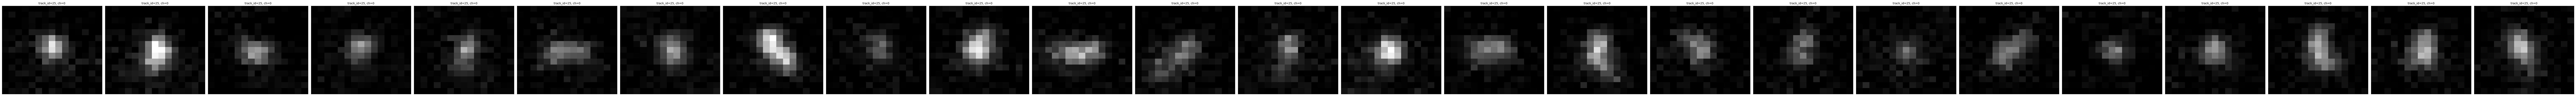

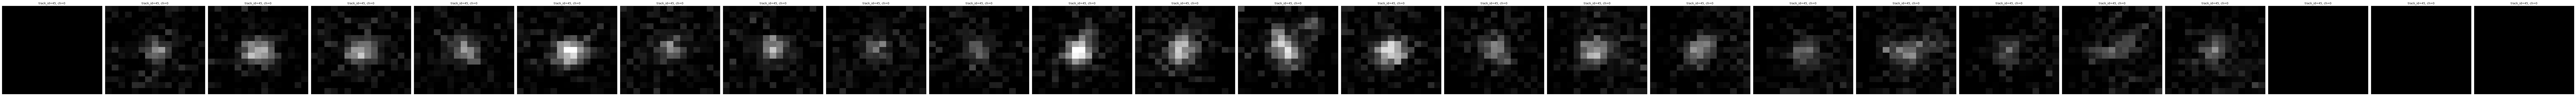

In [19]:
ca.crop_array_tools.plot_rgb_and_channels_imshow(data=ta1, fov=0, track_id=[14,25,45], t_slice=(0, 500, 20), rolling=1, quantile_range=(0.02, 0.999));

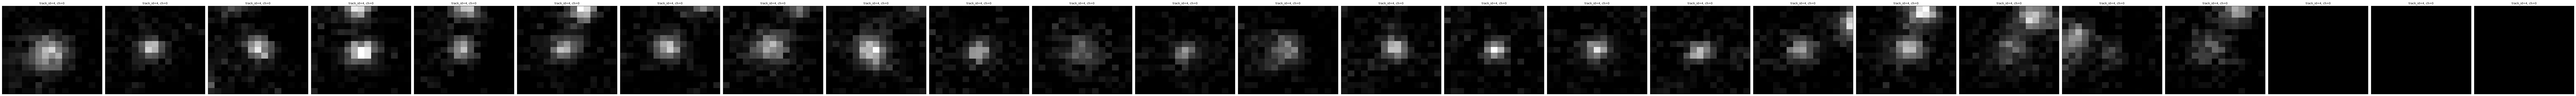

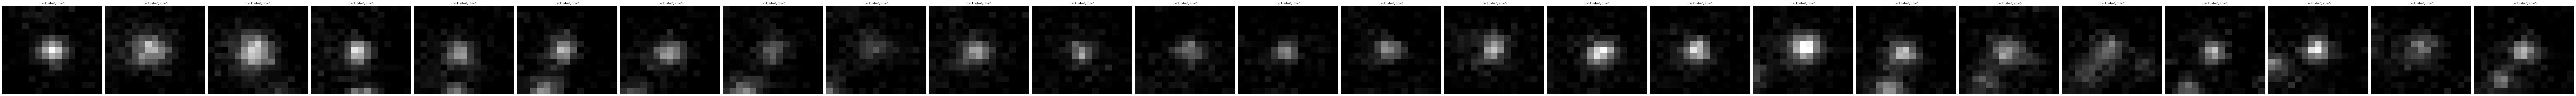

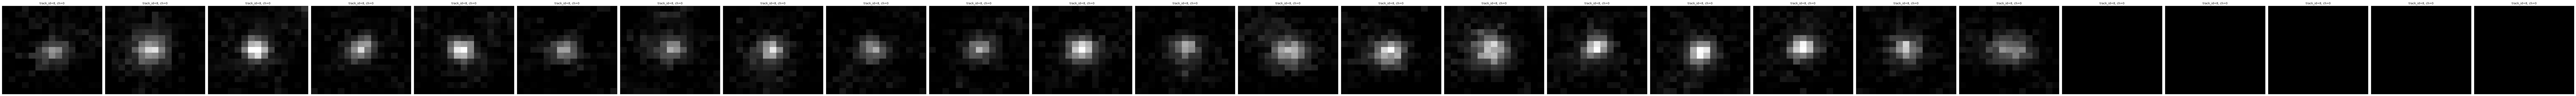

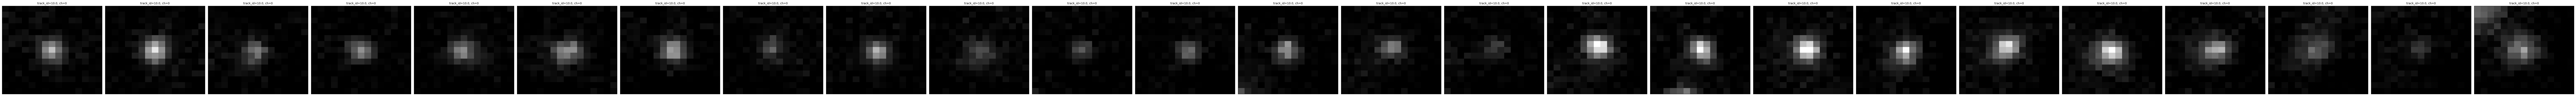

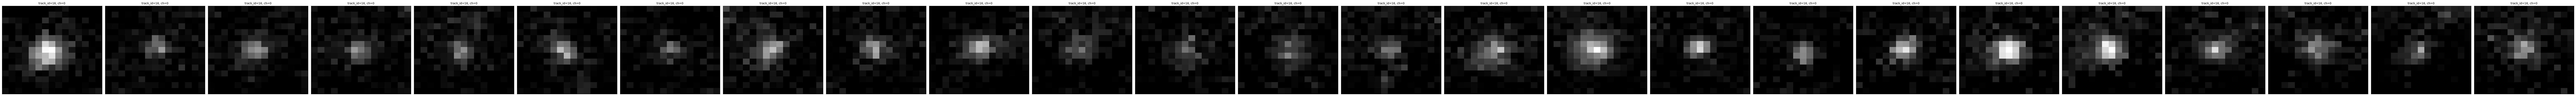

In [12]:
ca.crop_array_tools.plot_rgb_and_channels_imshow(data=ta2, fov=0, track_id=[4,6,8,10.,16], t_slice=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

In [ ]:
ca.crop_array_tools.

In [17]:
import napari
# view the action of montage
viewer=napari.view_image(ca.crop_array_tools.montage(ca1, row = 't', col = 't').best_z.sel(ch=0))
#nbscreenshot(viewer)

/tmp/ipykernel_14769/237600312.py:3: FutureWarning: `napari.view_image` is deprecated and will be removed in napari 0.7.0.
Use `viewer = napari.Viewer(); viewer.add_image(...)` instead.
  viewer=napari.view_image(ca.crop_array_tools.montage(ca1, row = 't', col = 't').best_z.sel(ch=0))


In [20]:
import napari
# view the action of montage
viewer2=napari.view_image(ca.crop_array_tools.montage(ca2, row = 't', col = 't').best_z.sel(ch=0))
#nbscreenshot(viewer)

/tmp/ipykernel_14769/669016401.py:3: FutureWarning: `napari.view_image` is deprecated and will be removed in napari 0.7.0.
Use `viewer = napari.Viewer(); viewer.add_image(...)` instead.
  viewer2=napari.view_image(ca.crop_array_tools.montage(ca2, row = 't', col = 't').best_z.sel(ch=0))
